# KOR COVID-19 dataset Analysis and Visualization

# 1조 : 이병현, 박은지, 김강태

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

In [2]:
Case = pd.read_csv('./Case.csv')
PatientInfo = pd.read_csv('./PatientInfo.csv')
Policy = pd.read_csv('./Policy.csv')
Region = pd.read_csv('./Region.csv')
SearchTrend = pd.read_csv('./SearchTrend.csv')
SeoulFloating = pd.read_csv('./SeoulFloating.csv')
Time = pd.read_csv('./Time.csv')
TimeAge = pd.read_csv('./TimeAge.csv')
TimeGender = pd.read_csv('./TimeGender.csv')
TimeProvince = pd.read_csv('./TimeProvince.csv')
Weather = pd.read_csv('./Weather.csv')

# Infection_case

In [3]:
PatientInfo.columns

Index(['patient_id', 'sex', 'age', 'country', 'province', 'city',
       'infection_case', 'infected_by', 'contact_number', 'symptom_onset_date',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')

In [4]:
Case.columns

Index([' case_id', 'province', 'city', 'group', 'infection_case', 'confirmed',
       'latitude', 'longitude'],
      dtype='object')

In [5]:
Case['infection_case'].unique()

array(['Itaewon Clubs', 'Richway', 'Guro-gu Call Center',
       'Yangcheon Table Tennis Club', 'Day Care Center',
       'Manmin Central Church', 'SMR Newly Planted Churches Group',
       'Dongan Church', 'Coupang Logistics Center', 'Wangsung Church',
       "Eunpyeong St. Mary's Hospital", 'Seongdong-gu APT',
       'Jongno Community Center', 'Samsung Medical Center',
       'Jung-gu Fashion Company', 'Yeonana News Class',
       'Korea Campus Crusade of Christ', 'Gangnam Yeoksam-dong gathering',
       'Daejeon door-to-door sales',
       'Geumcheon-gu rice milling machine manufacture',
       'Shincheonji Church', 'Guri Collective Infection',
       'KB Life Insurance', 'Yeongdeungpo Learning Institute',
       'Gangnam Dongin Church', 'Biblical Language study meeting',
       'Seocho Family', 'Anyang Gunpo Pastors Group',
       'Samsung Fire & Marine Insurance', 'SJ Investment Call Center',
       'Yongin Brothers', 'Seoul City Hall Station safety worker',
       'Uiwang Logisti

In [6]:
PatientInfo['infection_case'].unique()

array(['overseas inflow', 'contact with patient', 'Seongdong-gu APT',
       'etc', "Eunpyeong St. Mary's Hospital", 'Shincheonji Church',
       'Dongan Church', 'Guro-gu Call Center', nan, 'Itaewon Clubs',
       'Samsung Medical Center', 'Biblical Language study meeting',
       'Coupang Logistics Center', 'Guri Collective Infection',
       'KB Life Insurance', 'Gangnam Dongin Church',
       'Korea Campus Crusade of Christ',
       'Yeongdeungpo Learning Institute', 'Yeonana News Class',
       'SMR Newly Planted Churches Group', 'Seocho Family',
       'Anyang Gunpo Pastors Group', 'Richway',
       'Samsung Fire & Marine Insurance', 'Yangcheon Table Tennis Club',
       'Yongin Brothers', 'Day Care Center',
       'Geumcheon-gu rice milling machine manufacture', 'Daezayeon Korea',
       'Orange Life', 'Daejeon door-to-door sales',
       'Seoul City Hall Station safety worker', 'Uiwang Logistics Center',
       'Wangsung Church', 'Gangnam Yeoksam-dong gathering',
       'Onchun

In [7]:
PatientInfo['infection_case'].isnull().sum()

919

In [8]:
a = PatientInfo['infection_case'].unique()
b = Case['infection_case'].unique()

print(len(a), len(b))

52 81


- PatientInfo 랑 Case의 infection_case가 다르네???

In [9]:
# PatientInfo에는 없고 Case에는 있는 infection_case

not_in_pi = []

for i in range(len(b)):
    if b[i] not in a :
        not_in_pi.append(b[i])
        
not_in_pi

['Manmin Central Church',
 'Jongno Community Center',
 'Jung-gu Fashion Company',
 'SJ Investment Call Center',
 'Haeundae-gu Catholic Church',
 'Jin-gu Academy',
 'Second Mi-Ju Hospital',
 'Hansarang Convalescent Hospital',
 'Daesil Convalescent Hospital',
 'Fatima Hospital',
 'Gwangneuksa Temple',
 'Door-to-door sales in Daejeon',
 'Dreaming Church',
 'Korea Forest Engineer Institute',
 'Seosan-si Laboratory',
 'Uijeongbu St. Mary’s Hospital',
 'Bundang Jesaeng Hospital',
 'Lotte Confectionery logistics center',
 'Lord Glory Church',
 'Suwon Saeng Myeong Saem Church',
 'Seongnam neighbors gathering',
 'Wonju-si Apartments',
 'Goesan-gun Jangyeon-myeon',
 'Eunpyeong-Boksagol culture center',
 'Yechun-gun',
 'Gumi Elim Church',
 'Wings Tower',
 'Geochang-gun Woongyang-myeon',
 'Hanmaeum Changwon Hospital',
 'Soso Seowon']

In [10]:
len(not_in_pi)

30

In [11]:
# Case에는 없고 PatientInfo에는 있는 infection_case

not_in_case = []

for i in range(len(a)):
    if a[i] not in b :
        not_in_case.append(a[i])
        
not_in_case

[nan]

- 아마 PatinetInfo의 nan값 혹은 etc가 not_in_pi들인데 제데로 기입이 되지 않은듯 하다.

- 데이터가 분석하기 그지같다는 예시1

In [12]:
Case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0    case_id        174 non-null    int64 
 1   province        174 non-null    object
 2   city            174 non-null    object
 3   group           174 non-null    bool  
 4   infection_case  174 non-null    object
 5   confirmed       174 non-null    int64 
 6   latitude        174 non-null    object
 7   longitude       174 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 9.8+ KB


In [13]:
Case[Case['confirmed'] == 0]

case_id    province        city  group             infection_case  \
29    1000030       Seoul  Gangseo-gu   True  SJ Investment Call Center   
118   3000007  Gangwon-do           -  False       contact with patient   
171   7000002     Jeju-do           -  False       contact with patient   

     confirmed   latitude   longitude  
29           0  37.559649  126.835102  
118          0          -           -  
171          0          -           -

In [14]:
PatientInfo[PatientInfo['infection_case']=='SJ Investment Call Center']   #.shape[0]

Empty DataFrame
Columns: [patient_id, sex, age, country, province, city, infection_case, infected_by, contact_number, symptom_onset_date, confirmed_date, released_date, deceased_date, state]
Index: []

- PatientInfo에도 없고 Case에서 confirmed == 0 이면 왜있는건지 모르겠다
  - 열받는 포인트2

In [15]:
Case[Case['infection_case'].isin(not_in_pi)]['confirmed'].sum()

845

In [16]:
PatientInfo['infection_case'].isnull().sum()

919

- PatientInfo의 nan값 갯수랑 비슷하긴 하네

In [17]:
PatientInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


In [18]:
Case['confirmed'].sum()

11395

- 당연히 PatientInfo row수랑 비슷할줄알았는데...

In [19]:
#Case['infection_case'].value_counts()

In [20]:
Case.groupby('infection_case')['confirmed'].max().sum()

8670

In [21]:
Case[~(Case['infection_case'].isin(not_in_pi))].groupby(' case_id')['confirmed'].max().sum()

10550

In [22]:
Case[~(Case['infection_case'].isin(not_in_pi))].groupby('infection_case')['confirmed'].max().sum()

7852

- 도데체가 Case 테이블은 근본을 모르겠다


- PatientInfo랑 동일 기간에 조사된것인지도 의문

### Case.city

- The value 'from other city' means that where the group infection started is other city. 검증

In [23]:
Case[(Case['group']==False) & (Case['city']=='from other city')]

Empty DataFrame
Columns: [ case_id, province, city, group, infection_case, confirmed, latitude, longitude]
Index: []

- 오 이건 리얼이네

## Case.group 탐색

In [24]:
Case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0    case_id        174 non-null    int64 
 1   province        174 non-null    object
 2   city            174 non-null    object
 3   group           174 non-null    bool  
 4   infection_case  174 non-null    object
 5   confirmed       174 non-null    int64 
 6   latitude        174 non-null    object
 7   longitude       174 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 9.8+ KB


<AxesSubplot:ylabel='group'>

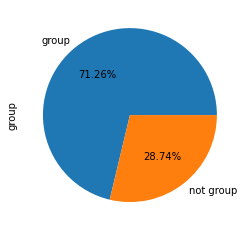

In [25]:
Case['group'].value_counts().plot(kind='pie', labels = ['group', 'not group'], autopct='%.2f%%')

In [26]:
Case[Case['group'] == False]['infection_case'].value_counts()

overseas inflow         17
etc                     17
contact with patient    16
Name: infection_case, dtype: int64

- PatientInfo에서 group / not group 나누기

In [27]:
PatientInfo_group = PatientInfo[(PatientInfo['infection_case'] != 'etc') 
                                                 & (PatientInfo['infection_case'] != 'overseas inflow' )
                                                 & (PatientInfo['infection_case'] != 'contact with patient')]

PatientInfo_notgroup = PatientInfo[(PatientInfo['infection_case'] == 'etc') 
                                                 | (PatientInfo['infection_case'] == 'overseas inflow' )
                                                 | (PatientInfo['infection_case'] == 'contact with patient')]

### group case (집단감염)

In [28]:
group_infection_case = PatientInfo_group['infection_case'].value_counts()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Itaewon Clubs'),
  Text(1, 0, 'Richway'),
  Text(2, 0, 'Guro-gu Call Center'),
  Text(3, 0, 'Shincheonji Church'),
  Text(4, 0, 'Coupang Logistics Center'),
  Text(5, 0, 'Yangcheon Table Tennis Club'),
  Text(6, 0, 'Day Care Center'),
  Text(7, 0, 'SMR Newly Planted Churches Group'),
  Text(8, 0, 'Onchun Church'),
  Text(9, 0, 'Bonghwa Pureun Nursing Home')])

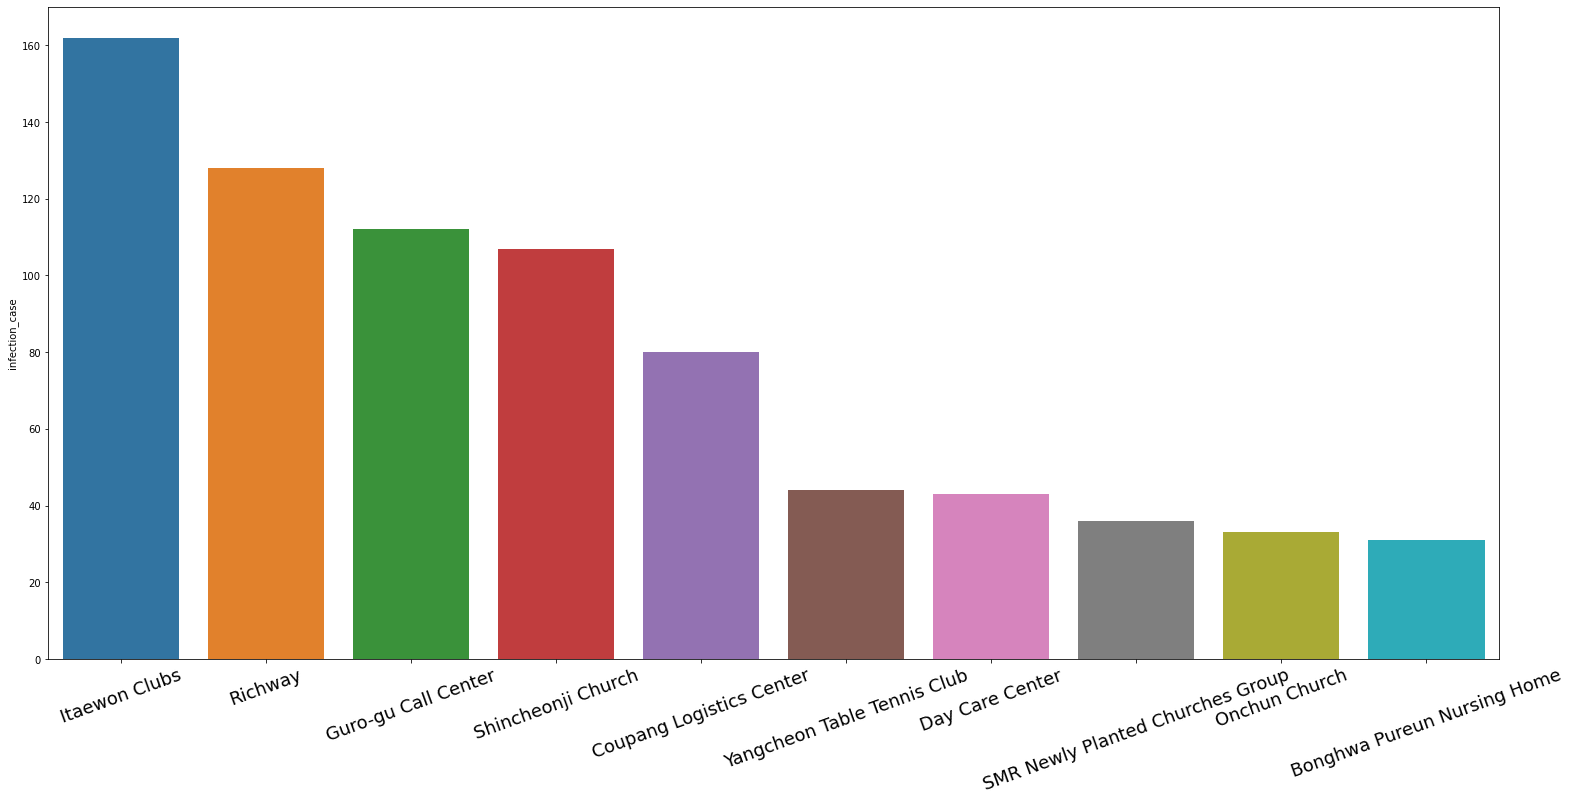

In [29]:
group_infection_case_top10 = group_infection_case[:10]

plt.figure(figsize=(26, 12))
sns.barplot(x=group_infection_case_top10.index, y=group_infection_case_top10)
plt.xticks(rotation=20, fontsize=18)

- 일단 group case별 얼마나 영향을 끼쳤는지 살펴봄
  - Patientinfo에서 infected_by가 어느 case에 속한 patient인지를 살펴봄

In [30]:
def infect_patient_per_case(case) :
    print(case + ':' + str(PatientInfo[PatientInfo['infected_by'].isin(PatientInfo[PatientInfo['infection_case']==case]['infected_by'].dropna())]['patient_id'].shape[0]))
    #return case, PatientInfo[PatientInfo['infected_by'].isin(PatientInfo[PatientInfo['infection_case']==case]['infected_by'].dropna())]['patient_id'].shape[0]

In [31]:
#top10_case = []
#top10_len = []
for i in enumerate(group_infection_case_top10.index):
    infect_patient_per_case(i[1])
    
    #case, _len = infect_patient_per_case(i[1])
    
    #top10_case.append(case)
    #top10_len.append(_len)

Itaewon Clubs:18
Richway:3
Guro-gu Call Center:2
Shincheonji Church:17
Coupang Logistics Center:3
Yangcheon Table Tennis Club:0
Day Care Center:0
SMR Newly Planted Churches Group:9
Onchun Church:5
Bonghwa Pureun Nursing Home:0


In [32]:
PatientInfo_group['infected_by'].isnull().sum() / len(PatientInfo_group)

0.9592445328031809

- 역시 역학조사는 호락호락하지 않다

- group case는 infected_by 결측치비율이 매우높아 그룹별 얼마나 코로나 뿌렸는지는 의미없다

### group case 별로 나이, 성별 확인

In [33]:
def per_case(col, case):
    return PatientInfo_group[PatientInfo_group['infection_case']==case].groupby(col)['patient_id'].count().plot(kind='bar')

In [34]:
per_case('age', 'Itaewon Clubs')

<AxesSubplot:xlabel='age'>

- 엥? 162명이나 있어야하는데?

  - infection_case가 이태원클럽인 patient는 162명이지만 'age'결측치가 많아 표본이 줄었다.
  
  
- 결측치한테 패배를 인정하고 결측치 있는 그데로 사용

<AxesSubplot:xlabel='sex'>

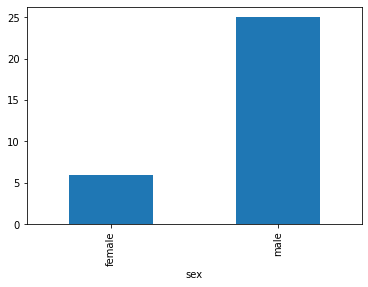

In [35]:
per_case('sex', 'Itaewon Clubs')

In [36]:
per_case('age', 'Shincheonji Church')

<AxesSubplot:xlabel='age'>

In [37]:
per_case('sex', 'Shincheonji Church')

<AxesSubplot:xlabel='sex'>

In [38]:
per_case('age', 'Guro-gu Call Center')

<AxesSubplot:xlabel='age'>

<AxesSubplot:xlabel='sex'>

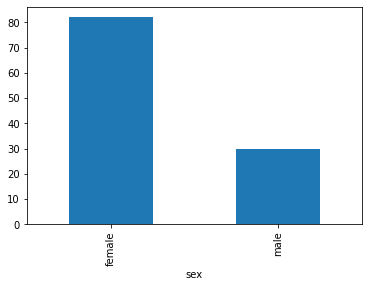

In [39]:
per_case('sex', 'Guro-gu Call Center')

In [40]:
PatientInfo_group['infection_case'].value_counts()

Itaewon Clubs                                    162
Richway                                          128
Guro-gu Call Center                              112
Shincheonji Church                               107
Coupang Logistics Center                          80
Yangcheon Table Tennis Club                       44
Day Care Center                                   43
SMR Newly Planted Churches Group                  36
Onchun Church                                     33
Bonghwa Pureun Nursing Home                       31
gym facility in Cheonan                           30
Ministry of Oceans and Fisheries                  28
Wangsung Church                                   24
Cheongdo Daenam Hospital                          21
Dongan Church                                     17
Eunpyeong St. Mary's Hospital                     16
Gyeongsan Seorin Nursing Home                     15
Dunsan Electronics Town                           13
KB Life Insurance                             

- 그럼 교회들만 모아서 살펴보자

In [41]:
PatientInfo_group_dropna = PatientInfo_group[PatientInfo_group.index.isin(PatientInfo_group['infection_case'].dropna().index)]

In [42]:
Church_case = PatientInfo_group_dropna[PatientInfo_group_dropna['infection_case'].str.contains('Church')]

<AxesSubplot:xlabel='age'>

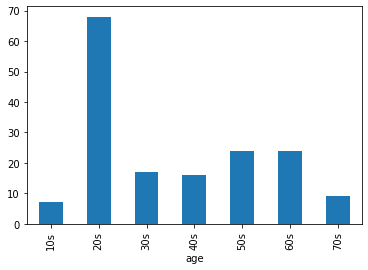

In [43]:
Church_case.groupby('age')['patient_id'].count().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

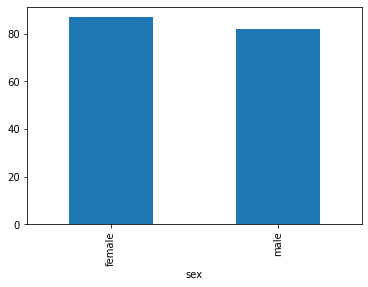

In [44]:
Church_case.groupby('sex')['patient_id'].count().plot(kind='bar')

- 이번엔 걍 전부

<AxesSubplot:xlabel='age'>

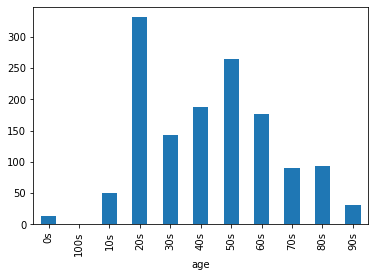

In [45]:
PatientInfo_group.groupby('age')['patient_id'].count().plot(kind='bar')

- 전체data age별 확진자 분포와 비슷한 것으로 보아 집단감염인지 아닌지는 age가 별 의미없음

<AxesSubplot:xlabel='sex'>

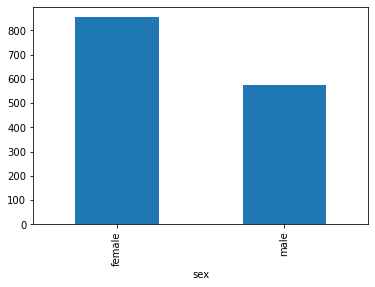

In [46]:
PatientInfo_group.groupby('sex')['patient_id'].count().plot(kind='bar')

## Not group

In [47]:
notgroup_infection = PatientInfo_notgroup['infection_case'].value_counts()
notgroup_infection

contact with patient    1610
overseas inflow          840
etc                      703
Name: infection_case, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'contact with patient'),
  Text(1, 0, 'overseas inflow'),
  Text(2, 0, 'etc')])

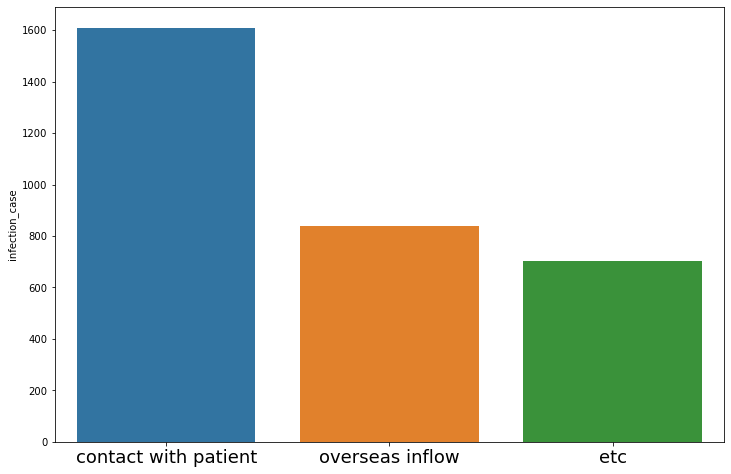

In [48]:
plt.figure(figsize=(12, 8))
sns.barplot(x=notgroup_infection.index, y=notgroup_infection)
plt.xticks( fontsize=18)

- The value 'etc' includes individual cases, cases where relevance classification is __ongoing__ after investigation, and cases __under investigation__ .

  - 열받는 point3 -> 결국 case분류가 안되었다는거지

- contact_number를 어떻게 조사했는지 모르겠지만 일단 했다니까 살펴봄

In [49]:
PatientInfo['contact_number'].unique()

array(['75', '31', '17', '9', '2', '43', '0', '68', '6', '23', '117',
       '27', '8', nan, '4', '3', '1', '1000000796', '13', '12', '1091',
       '131', '16', '14', '485', '19', '296', '15', '34', '37', '22', '7',
       '10', '28', '21', '5', '25', '18', '159', '11', '30', '41', '71',
       '38', '24', '185', '69', '39', '1160', '450', '65', '156', '47',
       '86', '74', '46', '64', '66', '40', '20', '42', '107', '29', '26',
       '45', '-', '95', '422', '290', '32', '53', '70', '35', '51', '130',
       '106', '174', '78', '33', '89', '61', '113', '36', '6100000098',
       '6100000099', '87', '84', '140', '72'], dtype=object)

- 일단 위에서 contact_number가 값이 큰애들 살펴보자

In [50]:
PatientInfo[(PatientInfo['contact_number']=='1000000796') | (PatientInfo['contact_number']=='6100000098')
            | (PatientInfo['contact_number']=='6100000099')]

patient_id     sex  age country          province          city  \
818   1000000819     NaN  NaN   Korea             Seoul  Eunpyeong-gu   
5109  6100000097  female  60s   Korea  Gyeongsangnam-do      Jinju-si   
5110  6100000098    male  60s   Korea  Gyeongsangnam-do      Jinju-si   

     infection_case infected_by contact_number symptom_onset_date  \
818             NaN         NaN     1000000796                NaN   
5109            etc         NaN     6100000098         2020-03-26   
5110            etc  6100000097     6100000099         2020-03-28   

     confirmed_date released_date deceased_date     state  
818      2020-05-27           NaN           NaN  released  
5109     2020-03-31           NaN           NaN  released  
5110     2020-03-31           NaN           NaN  released

In [51]:
PatientInfo.iloc[5108:5114]

patient_id     sex  age country          province         city  \
5108  6100000096    male  60s   Korea  Gyeongsangnam-do  Changwon-si   
5109  6100000097  female  60s   Korea  Gyeongsangnam-do     Jinju-si   
5110  6100000098    male  60s   Korea  Gyeongsangnam-do     Jinju-si   
5111  6100000099    male  40s   Korea  Gyeongsangnam-do     Jinju-si   
5112  6100000100  female  60s   Korea  Gyeongsangnam-do     Jinju-si   
5113  6100000101    male  40s   Korea  Gyeongsangnam-do   Yangsan-si   

       infection_case infected_by contact_number symptom_onset_date  \
5108  overseas inflow         NaN            NaN         2020-03-24   
5109              etc         NaN     6100000098         2020-03-26   
5110              etc  6100000097     6100000099         2020-03-28   
5111              etc  6100000098            NaN         2020-03-31   
5112              etc  6100000097            NaN         2020-03-28   
5113  overseas inflow         NaN            NaN         2020-03-28   

     confirmed_date released_date deceased_date     state  
5108     2020-03-31    2020-04-25           NaN  released  
5109     2020-03-31           NaN           NaN  released  
5110     2020-03-31           NaN           NaN  released  
5111     2020-03-31           NaN           NaN  released  
5112     2020-03-31           NaN           NaN  released  
5113     2020-03-31           NaN           NaN  released

- 일단 아줌마아저씨 4명이서 제주도놀러갔는데 infection_case도 조사안되었고 보균자가 있는지 동시에 제주에가서 감염되었는지 뭔지 모른다....


- 그렇게에 잘못 기입된 contact_number는 널값으로 대체 -> 어짜피 널값은 분석 할 때 무시하거나 삭제할것이기에

In [52]:
PatientInfo.iloc[5109:5111]['contact_number'].replace('6100000098', np.nan, inplace=True)
PatientInfo.iloc[5109:5111]['contact_number'].replace('6100000099', np.nan, inplace=True)

In [53]:
PatientInfo.iloc[5109:5111]

patient_id     sex  age country          province      city  \
5109  6100000097  female  60s   Korea  Gyeongsangnam-do  Jinju-si   
5110  6100000098    male  60s   Korea  Gyeongsangnam-do  Jinju-si   

     infection_case infected_by contact_number symptom_onset_date  \
5109            etc         NaN            NaN         2020-03-26   
5110            etc  6100000097            NaN         2020-03-28   

     confirmed_date released_date deceased_date     state  
5109     2020-03-31           NaN           NaN  released  
5110     2020-03-31           NaN           NaN  released

In [54]:
PatientInfo[PatientInfo['patient_id']==1000000796]

patient_id  sex  age country province          city  \
795  1000000796  NaN  NaN   Korea    Seoul  Eunpyeong-gu   

               infection_case infected_by contact_number symptom_onset_date  \
795  Coupang Logistics Center         NaN            NaN                NaN   

    confirmed_date released_date deceased_date     state  
795     2020-05-26           NaN           NaN  released

- 같은 은평구여서 infected_by가 잘못 기입된거 같지만 걍 nan으로 대체

In [55]:
PatientInfo['contact_number'].replace('1000000796',np.nan, inplace=True)

In [56]:
#PatientInfo['contact_number'].fillna('0', inplace=True)
#PatientInfo['contact_number'].replace('-','0', inplace=True

In [57]:
#PatientInfo = PatientInfo.astype({'contact_number' : 'int64'})

In [58]:
#PatientInfo[PatientInfo['contact_number'] > 100].sort_values(by=['contact_number'],ascending=False)

# Time ~ 테이블

### PatientInfo에서 연령대/성별 확진자수 확인

Text(0.5, 1.0, 'confirmed per age / sex')

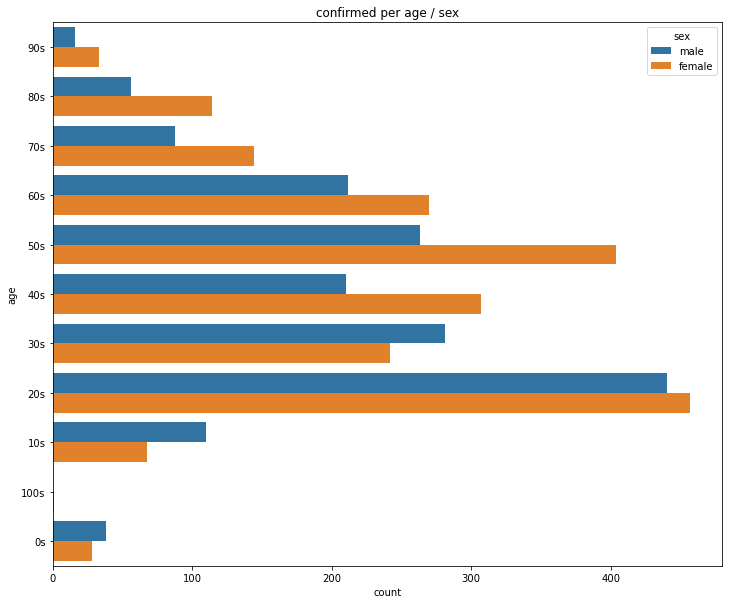

In [59]:
plt.figure(figsize=(12, 10))
sns.countplot(y="age", hue="sex", data=PatientInfo.sort_values('age', ascending=False))
plt.title("confirmed per age / sex")

- 20대가 가장 많으니 20대에 초점을 맞춰서 뭔짓을 한건지 살펴보면 좋을듯


- 40,50대 여성의 비율이 많은 이유는???
  - 여기서 가설을 세워볼 수 있는 것은 특정 그룹감염으로인해 비율이 많지 않을까???

- 40,50대 집단감염

In [60]:
PatientInfo_group[(PatientInfo_group['age']=='40s') | (PatientInfo_group['age']=='50s')]['infection_case'].value_counts()

Guro-gu Call Center                      70
Shincheonji Church                       27
gym facility in Cheonan                  21
Ministry of Oceans and Fisheries         21
Cheongdo Daenam Hospital                 10
Bonghwa Pureun Nursing Home               7
Seongdong-gu APT                          7
Milal Shelter                             5
Onchun Church                             5
Coupang Logistics Center                  4
Gyeongsan Seorin Nursing Home             3
gym facility in Sejong                    3
Orange Town                               3
Dongan Church                             3
Geochang Church                           3
SMR Newly Planted Churches Group          2
Eunpyeong St. Mary's Hospital             2
Gyeongsan Jeil Silver Town                2
Itaewon Clubs                             2
Dunsan Electronics Town                   1
Suyeong-gu Kindergarten                   1
Richway                                   1
Gyeongsan Cham Joeun Community C

<AxesSubplot:xlabel='age'>

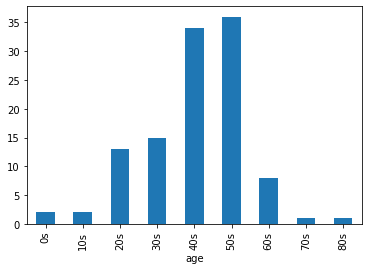

In [61]:
per_case('age', 'Guro-gu Call Center')

<AxesSubplot:xlabel='sex'>

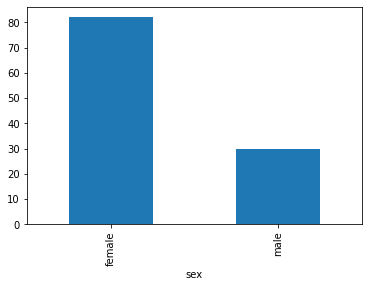

In [62]:
per_case('sex', 'Guro-gu Call Center')

<AxesSubplot:xlabel='age'>

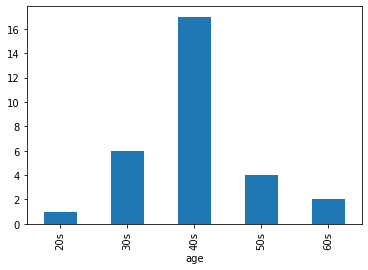

In [63]:
per_case('age', 'gym facility in Cheonan')

In [64]:
per_case('sex', 'gym facility in Cheonan')

<AxesSubplot:xlabel='sex'>

### PatientInfo에서 연령대/지역별 확진자수 확인

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Seoul'),
  Text(1, 0, 'Busan'),
  Text(2, 0, 'Daegu'),
  Text(3, 0, 'Gwangju'),
  Text(4, 0, 'Incheon'),
  Text(5, 0, 'Daejeon'),
  Text(6, 0, 'Gyeonggi-do'),
  Text(7, 0, 'Sejong'),
  Text(8, 0, 'Ulsan'),
  Text(9, 0, 'Gangwon-do'),
  Text(10, 0, 'Chungcheongbuk-do'),
  Text(11, 0, 'Chungcheongnam-do'),
  Text(12, 0, 'Jeollabuk-do'),
  Text(13, 0, 'Jeollanam-do'),
  Text(14, 0, 'Gyeongsangbuk-do'),
  Text(15, 0, 'Gyeongsangnam-do'),
  Text(16, 0, 'Jeju-do')])

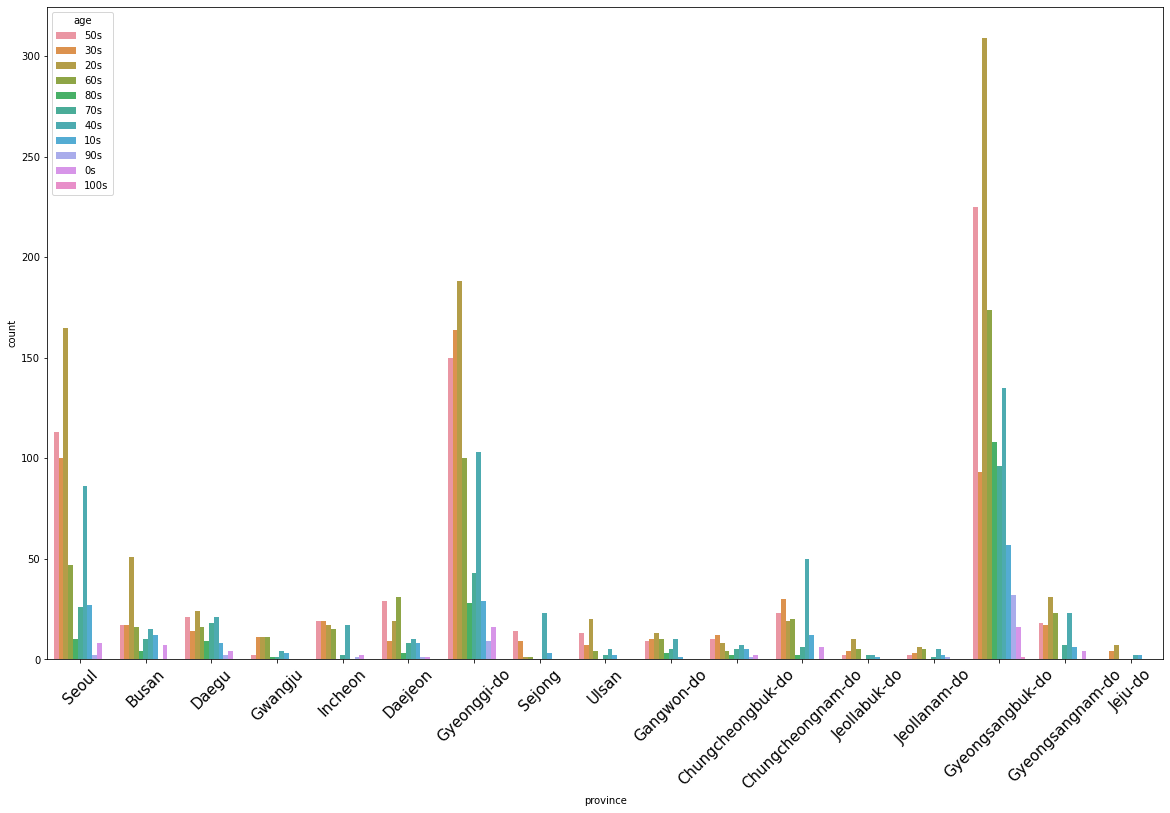

In [65]:
plt.figure(figsize=(20,12))
sns.countplot(x='province', hue='age', data=PatientInfo)
plt.xticks(rotation=45, fontsize=15)

- 확진자수 top3인 경북, 서울, 경기 에서 20대만 뽑아봄

In [66]:
age20s = PatientInfo[PatientInfo['age']=='20s']

is_seoul = age20s['province']=='Seoul'
is_Gyeongsangbuk_do = age20s['province']=='Gyeongsangbuk-do'
is_Gyeonggi_do = age20s['province'] == 'Gyeonggi-do'


SGG = age20s[is_seoul|is_Gyeongsangbuk_do|is_Gyeonggi_do]  # S&G&S
SGG

patient_id     sex  age        country          province  \
3     1000000004    male  20s          Korea             Seoul   
4     1000000005  female  20s          Korea             Seoul   
6     1000000007    male  20s          Korea             Seoul   
7     1000000008    male  20s          Korea             Seoul   
11    1000000012    male  20s          Korea             Seoul   
17    1000000018    male  20s          Korea             Seoul   
28    1000000029  female  20s          Korea             Seoul   
33    1000000034    male  20s          Korea             Seoul   
42    1000000043  female  20s          Korea             Seoul   
45    1000000046  female  20s          Korea             Seoul   
46    1000000047    male  20s          Korea             Seoul   
47    1000000048  female  20s          Korea             Seoul   
49    1000000050    male  20s          Korea             Seoul   
50    1000000051  female  20s          Korea             Seoul   
54    1000000055  female  20s          Korea             Seoul   
66    1000000067  female  20s          Korea             Seoul   
67    1000000068  female  20s          Korea             Seoul   
76    1000000077  female  20s          Korea             Seoul   
79    1000000080  female  20s          Korea             Seoul   
82    1000000083  female  20s          Korea             Seoul   
83    1000000084  female  20s          Korea             Seoul   
91    1000000092    male  20s          Korea             Seoul   
94    1000000095  female  20s          Korea             Seoul   
98    1000000099  female  20s          Korea             Seoul   
102   1000000103    male  20s          Korea             Seoul   
113   1000000114  female  20s          Korea             Seoul   
121   1000000122  female  20s          Korea             Seoul   
123   1000000124    male  20s          Korea             Seoul   
129   1000000130    male  20s          Korea             Seoul   
133   1000000134  female  20s          Korea             Seoul   
146   1000000147    male  20s          Korea             Seoul   
173   1000000174    male  20s          Korea             Seoul   
174   1000000175  female  20s          Korea             Seoul   
177   1000000178  female  20s          Korea             Seoul   
187   1000000188  female  20s          Korea             Seoul   
188   1000000189    male  20s          Korea             Seoul   
191   1000000192  female  20s          Korea             Seoul   
192   1000000193    male  20s          Korea             Seoul   
202   1000000203    male  20s          Korea             Seoul   
204   1000000205  female  20s          Korea             Seoul   
205   1000000206  female  20s          Korea             Seoul   
210   1000000211    male  20s          Korea             Seoul   
211   1000000212  female  20s          Korea             Seoul   
212   1000000213  female  20s          Korea             Seoul   
216   1000000217    male  20s          Korea             Seoul   
222   1000000223  female  20s          Korea             Seoul   
224   1000000225    male  20s          Korea             Seoul   
225   1000000226    male  20s          Korea             Seoul   
229   1000000230    male  20s          Korea             Seoul   
231   1000000232    male  20s          Korea             Seoul   
232   1000000233  female  20s          Korea             Seoul   
233   1000000234  female  20s          Korea             Seoul   
235   1000000236    male  20s          Korea             Seoul   
236   1000000237  female  20s          Korea             Seoul   
238   1000000239    male  20s          Korea             Seoul   
241   1000000242    male  20s          Korea             Seoul   
248   1000000249  female  20s          Korea             Seoul   
255   1000000256  female  20s          Korea             Seoul   
257   1000000258    male  20s          Korea             Seoul   
258   1000000259    male  20s          Korea  

In [67]:
plt.figure(figsize=(12,12))
sns.countplot(data=SGG, y="infection_case", hue = "province")
plt.legend(loc="upper right")

- 별 의미없지만 하나 알 수 있는건 경북지방이 서울,경기에 비해 etc가 많았다는것

In [68]:
Time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       163 non-null    object
 1   time       163 non-null    int64 
 2   test       163 non-null    int64 
 3   negative   163 non-null    int64 
 4   confirmed  163 non-null    int64 
 5   released   163 non-null    int64 
 6   deceased   163 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 9.0+ KB


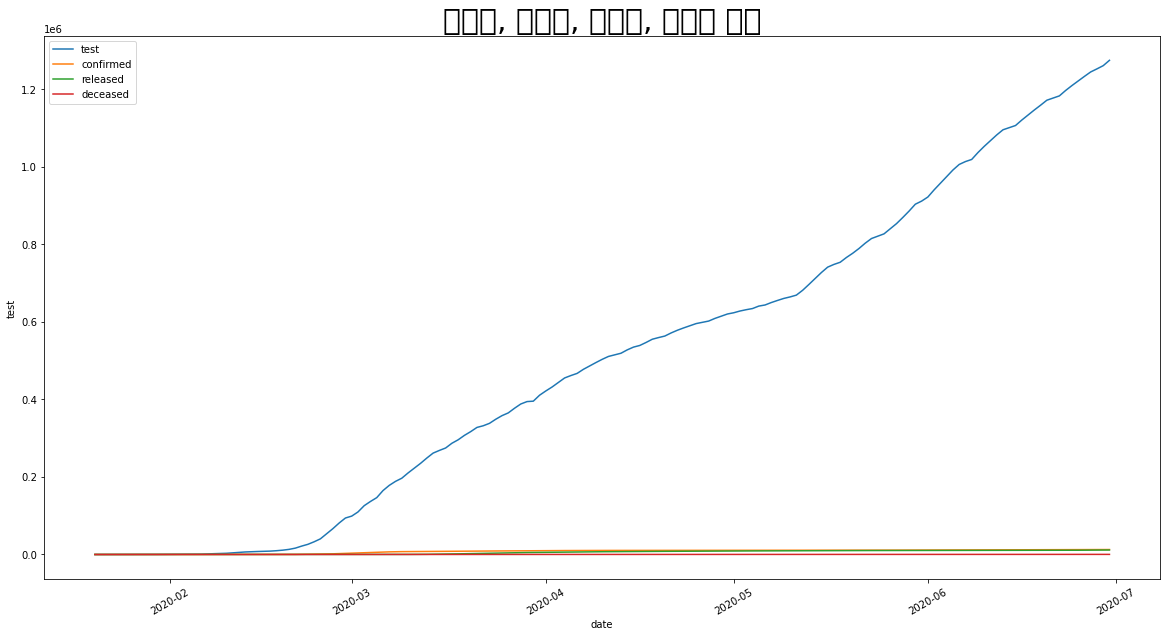

In [69]:
Time['date'] = pd.to_datetime(Time['date'], format='%Y-%m-%d')

plt.figure(figsize=(20, 10))
sns.lineplot(x='date', y='test', label='test', data=Time)
sns.lineplot(x='date', y='confirmed', label='confirmed', data=Time)
sns.lineplot(x='date', y='released', label='released', data=Time)
sns.lineplot(x='date', y='deceased', label='deceased', data=Time)
plt.xticks(rotation=30)
plt.title('검사자, 확진자, 완치자, 사망자 추이', fontsize=30)
plt.legend()
plt.show()

- time테이블에서 test, confirmed, released, deceased누산 결과를 lineplot으로 그려보니 test수에비해 나머지는 현저히 적다

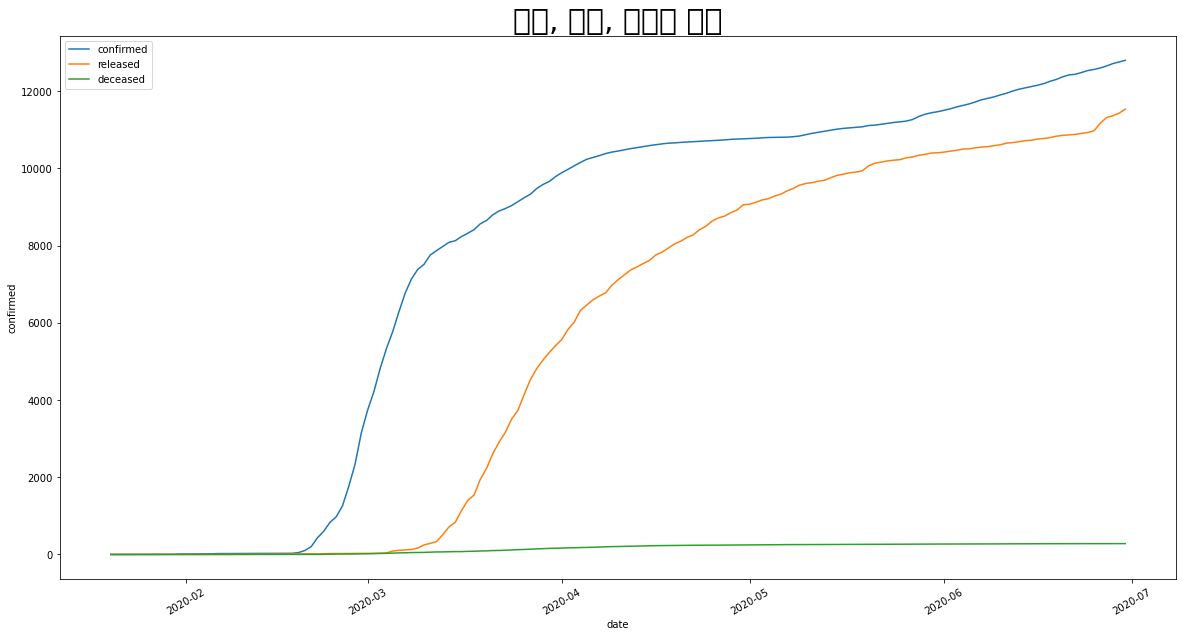

In [70]:
Time['date'] = pd.to_datetime(Time['date'], format='%Y-%m-%d')

plt.figure(figsize=(20, 10))
sns.lineplot(x='date', y='confirmed', label='confirmed', data=Time)
sns.lineplot(x='date', y='released', label='released', data=Time)
sns.lineplot(x='date', y='deceased', label='deceased', data=Time)
plt.xticks(rotation=30)
plt.title('확진, 완치, 사망자 추이', fontsize=30)
plt.legend()
plt.show()

- 그래서 test를 제외한 confirmed, relased, deceased만 살펴보니 일정 confirmed들이 일정 시간 후에 released되는걸 볼 수 있다

## 일별 확진자 수 확인 + released / deceased

In [71]:
# 확진자 변동량, 변동률 특성 추가

Time['tomorrow_confirmed'] = Time['confirmed'].shift(-1)
Time['Fluctuation_confirmed'] = Time['tomorrow_confirmed'] - Time['confirmed']
#Time['Fluctuation_rate'] = Time['Fluctuation'] / Time['confirmed'] 

Time['tomorrow_released'] = Time['released'].shift(-1)
Time['Fluctuation_released'] = Time['tomorrow_released'] - Time['released']

Time['tomorrow_deceased'] = Time['deceased'].shift(-1)
Time['Fluctuation_deceased'] = Time['tomorrow_deceased'] - Time['deceased']

In [72]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=Time['date'], y=Time['Fluctuation_confirmed'], label='confirmed')
sns.lineplot(x=Time['date'], y=Time['Fluctuation_released'], label='released')
sns.lineplot(x=Time['date'], y=Time['Fluctuation_deceased'], label='deceased')
plt.legend()
plt.xticks(rotation=30)

(array([18293., 18322., 18353., 18383., 18414., 18444.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

- 3월에 확진자가 많이나왔다 뭔일이었는지 살펴보자

In [73]:
march = PatientInfo[PatientInfo['confirmed_date'] < '2020-03-16']
march_count = march.groupby('confirmed_date').count()

In [74]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=march_count, x=march_count.index, y="patient_id")
plt.xticks(rotation=90)
plt.title("2020-01-30 ~ 2020-03-15 확진자 추이")

Text(0.5, 1.0, '2020-01-30 ~ 2020-03-15 확진자 추이')

<AxesSubplot:xlabel='infection_case'>

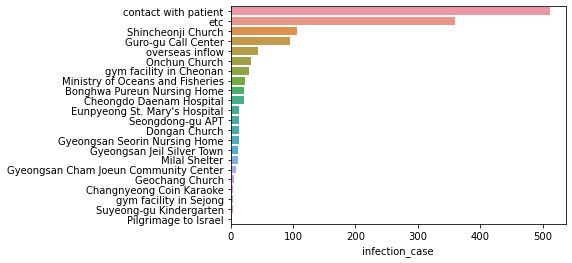

In [75]:
sns.barplot(march['infection_case'].value_counts(), march['infection_case'].value_counts().index)

In [76]:
march_shin_cc = march[(march['infection_case'] == 'Shincheonji Church') | (march['infection_case'] == 'Guro-gu Call Center')]
march_shin_cc_count = march_shin_cc.groupby('confirmed_date').count()

In [77]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=march_count, x=march_count.index, y="patient_id")
sns.lineplot(data=march_shin_cc_count, x=march_shin_cc_count.index, y="patient_id")
plt.xticks(rotation=90)
plt.title("2020-01-30 ~ 2020-03-15 확진자 추이")

Text(0.5, 1.0, '2020-01-30 ~ 2020-03-15 확진자 추이')

- 3월8일부로 확진자 떨어지는 흐름이었는데 신천지랑 구로콜센터가 힘을 합쳐 멱살잡고 끌어올림

## 사망자 추이

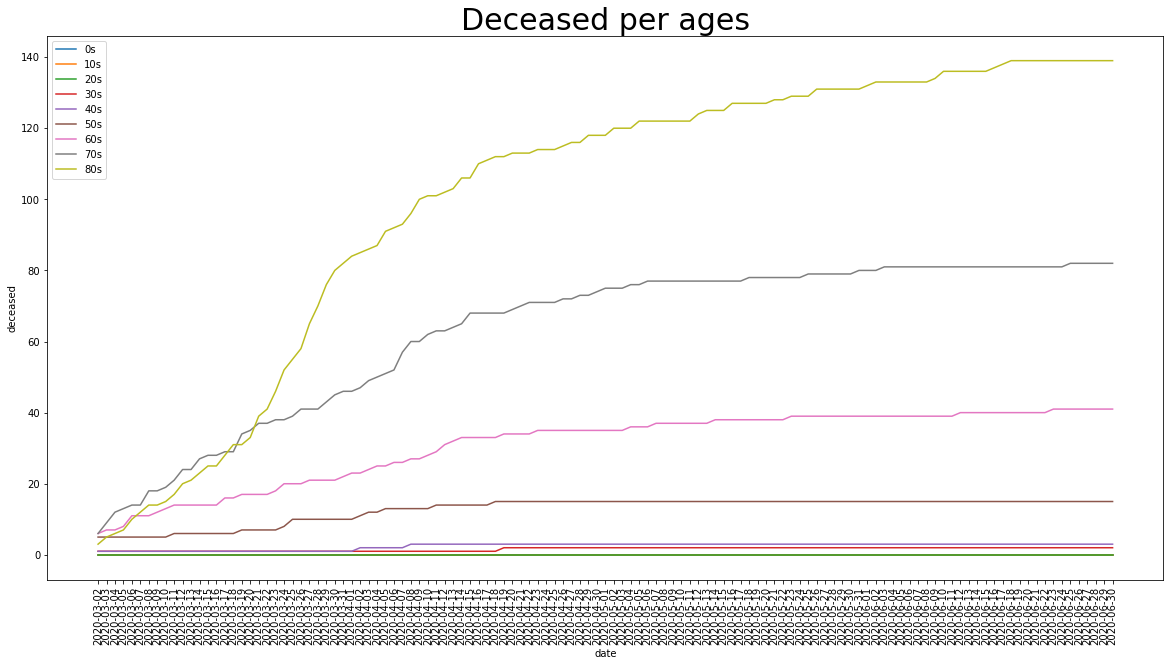

In [78]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='date', y='deceased', hue='age', data=TimeAge)
plt.xticks(rotation=90)
plt.title('Deceased per ages', fontsize=30)
plt.legend()
plt.show()

- 80대가 많으니 80대만 살펴본다 (경북, 경기)

In [79]:
age80s = PatientInfo[PatientInfo['age']=='80s']

is_Gyeongsangbuk_do = age80s['province']=='Gyeongsangbuk-do'
is_Gyeonggi_do = age80s['province'] == 'Gyeonggi-do'

GG= age80s[is_Gyeongsangbuk_do|is_Gyeonggi_do] 

In [80]:
plt.figure(figsize=(12,12))
sns.countplot(data=GG, y="infection_case", hue = "province")
plt.legend(loc="upper right")

- 경북지방에서의 80대 사망자는 집단감영에의한 사망자 추이가 눈에 띈다

### symptom_onset_date ~ confirmed_date

- 증상이후로 얼마나 빠르게 검사를 받았나

In [81]:
PatientInfo.columns

Index(['patient_id', 'sex', 'age', 'country', 'province', 'city',
       'infection_case', 'infected_by', 'contact_number', 'symptom_onset_date',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')

In [82]:
notnull_sympton = PatientInfo[~(PatientInfo['symptom_onset_date'].isnull())]

In [83]:
notnull_sympton[notnull_sympton['symptom_onset_date'] == ' ']

patient_id     sex  age country province city   infection_case  \
1620  1300000021  female  40s   Korea  Gwangju  NaN  overseas inflow   

     infected_by contact_number symptom_onset_date confirmed_date  \
1620         NaN            NaN                        2020-03-31   

     released_date deceased_date     state  
1620    2020-04-13           NaN  isolated

In [84]:
notnull_sympton.drop(1620, inplace=True)

In [85]:
notnull_sympton.confirmed_date = pd.to_datetime(notnull_sympton.confirmed_date)
notnull_sympton.symptom_onset_date = pd.to_datetime(notnull_sympton.symptom_onset_date)

notnull_sympton['between_sym_and_confirmed'] = notnull_sympton['confirmed_date'] - notnull_sympton['symptom_onset_date']

#notnull_sympton['between_sym_and_confirmed']

In [86]:
notnull_sympton['between_sym_and_confirmed'].value_counts().sort_index()

-8 days      1
-2 days      1
-1 days      2
0 days      26
1 days     138
2 days     112
3 days      96
4 days      63
5 days      62
6 days      47
7 days      30
8 days      34
9 days      17
10 days     15
11 days     10
12 days      7
13 days      8
14 days      2
15 days      4
16 days      2
19 days      1
25 days      1
27 days      1
33 days      1
41 days      1
42 days      1
45 days      3
47 days      1
48 days      1
Name: between_sym_and_confirmed, dtype: int64

In [87]:
notnull_sympton[(notnull_sympton['between_sym_and_confirmed'] == '-8 days') | (notnull_sympton['between_sym_and_confirmed'] == '-2 days')
               | (notnull_sympton['between_sym_and_confirmed'] == '-1 days')]

patient_id     sex  age country          province         city  \
1374  1100000063  female  30s   Korea             Busan       Buk-gu   
1597  1200012628    male  70s   Korea             Daegu   Suseong-gu   
1652  1400000009    male   0s   Korea           Incheon  Michuhol-gu   
5107  6100000095    male  50s   Korea  Gyeongsangnam-do  Changwon-si   

               infection_case infected_by contact_number symptom_onset_date  \
1374  Suyeong-gu Kindergarten         NaN              2         2020-02-28   
1597                      NaN         NaN            NaN         2020-06-27   
1652     contact with patient         NaN            NaN         2020-03-04   
5107          overseas inflow         NaN            NaN         2020-03-28   

     confirmed_date released_date deceased_date     state  \
1374     2020-02-27           NaN           NaN  released   
1597     2020-06-25           NaN           NaN  isolated   
1652     2020-03-03    2020-04-13           NaN  released   
5107     2020-03-20    2020-05-01           NaN  released   

     between_sym_and_confirmed  
1374                   -1 days  
1597                   -2 days  
1652                   -1 days  
5107                   -8 days

- 이상치 제거

In [88]:
notnull_sympton.drop([1374, 1597, 1652, 5107], inplace=True)

In [89]:
notnull_sympton['between_sym_and_confirmed'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

In [90]:
notnull_sympton.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 5134
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   patient_id                 685 non-null    int64          
 1   sex                        548 non-null    object         
 2   age                        549 non-null    object         
 3   country                    685 non-null    object         
 4   province                   685 non-null    object         
 5   city                       680 non-null    object         
 6   infection_case             667 non-null    object         
 7   infected_by                188 non-null    object         
 8   contact_number             259 non-null    object         
 9   symptom_onset_date         685 non-null    datetime64[ns] 
 10  confirmed_date             684 non-null    datetime64[ns] 
 11  released_date              166 non-null    object        

- 결측치 제거

In [91]:
notnull_sympton.drop(notnull_sympton[notnull_sympton['between_sym_and_confirmed'].isnull()].index, inplace=True)

In [92]:
notnull_sympton = notnull_sympton.astype({'between_sym_and_confirmed' : 'int64'})

<AxesSubplot:xlabel='age'>

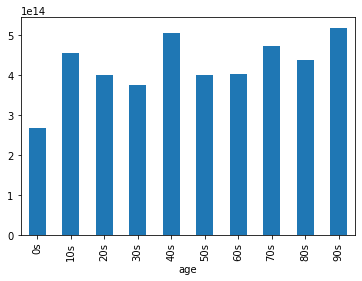

In [93]:
notnull_sympton.groupby(['age'])['between_sym_and_confirmed'].mean().plot(kind='bar')

In [94]:
notnull_sympton.groupby(['sex'])['between_sym_and_confirmed'].mean().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

In [95]:
notnull_sympton.groupby(['province'])['between_sym_and_confirmed'].mean().plot(kind='bar')

<AxesSubplot:xlabel='province'>

## Policy

In [96]:
Policy

policy_id country            type  \
0           1   Korea           Alert   
1           2   Korea           Alert   
2           3   Korea           Alert   
3           4   Korea           Alert   
4           5   Korea     Immigration   
5           6   Korea     Immigration   
6           7   Korea     Immigration   
7           8   Korea     Immigration   
8           9   Korea     Immigration   
9          10   Korea     Immigration   
10         11   Korea     Immigration   
11         12   Korea     Immigration   
12         13   Korea     Immigration   
13         14   Korea     Immigration   
14         15   Korea     Immigration   
15         16   Korea     Immigration   
16         17   Korea     Immigration   
17         18   Korea     Immigration   
18         19   Korea     Immigration   
19         20   Korea          Health   
20         21   Korea          Health   
21         22   Korea          Health   
22         23   Korea          Health   
23         24   Korea          Health   
24         25   Korea          Health   
25         26   Korea          Health   
26         27   Korea          Health   
27         28   Korea          Health   
28         29   Korea          Social   
29         30   Korea          Social   
30         31   Korea          Social   
31         32   Korea          Social   
32         33   Korea          Social   
33         34   Korea       Education   
34         35   Korea       Education   
35         36   Korea       Education   
36         37   Korea       Education   
37         38   Korea       Education   
38         39   Korea       Education   
39         40   Korea       Education   
40         41   Korea       Education   
41         42   Korea       Education   
42         43   Korea       Education   
43         44   Korea       Education   
44         45   Korea       Education   
45         46   Korea       Education   
46         47   Korea       Education   
47         48   Korea       Education   
48         49   Korea      Technology   
49         50   Korea      Technology   
50         51   Korea      Technology   
51         52   Korea      Technology   
52         53   Korea      Technology   
53         54   Korea  Administrative   
54         55   Korea  Administrative   
55         56   Korea  Administrative   
56         57   Korea  Transformation   
57         58   Korea  Transformation   
58         59   Korea  Transformation   
59         60   Korea      Technology   
60         61   Korea          Health   

                                       gov_policy  \
0                  Infectious Disease Alert Level   
1                  Infectious Disease Alert Level   
2                  Infectious Disease Alert Level   
3                  Infectious Disease Alert Level   
4                   Special Immigration Procedure   
5                   Special Immigration Procedure   
6                   Special Immigration Procedure   
7                   Special Immigration Procedure   
8                   Special Immigration Procedure   
9                   Special Immigration Procedure   
10                  Special Immigration Procedure   
11                  Special Immigration Procedure   
12                  Special Immigration Procedure   
13                  Special Immigration Procedure   
14                  Special Immigration Procedure   
15                  Special Immigration Procedure   
16                  Special Immigration Procedure   
17               Mandatory 14-day Self-Quarantine   
18  Mandatory Self-Quarantine & Diagonostic Tests   
19  Emergency Use Authorization of Diagnostic Kit   
20  Emergency Use Authorization of Diagnostic Kit   
21  Emergency Use Authorization of Diagnostic Kit   
22  Emergency Use Authorization of Diagnostic Kit   
23  Emergency Use Authorization of Diagnostic Kit   
24                 Drive-Through Screening Center   
25                 Drive-Through Screening Center   
26                            

In [97]:
Policy.columns

Index(['policy_id', 'country', 'type', 'gov_policy', 'detail', 'start_date',
       'end_date'],
      dtype='object')

In [98]:
Policy[Policy['type'] == 'Education']

policy_id country       type                        gov_policy  \
33         34   Korea  Education                    School Closure   
34         35   Korea  Education              School Opening Delay   
35         36   Korea  Education              School Opening Delay   
36         37   Korea  Education              School Opening Delay   
37         38   Korea  Education              School Opening Delay   
38         39   Korea  Education  School Opening with Online Class   
39         40   Korea  Education  School Opening with Online Class   
40         41   Korea  Education  School Opening with Online Class   
41         42   Korea  Education  School Opening with Online Class   
42         43   Korea  Education  School Opening with Online Class   
43         44   Korea  Education  School Opening with Online Class   
44         45   Korea  Education  School Opening with Online Class   
45         46   Korea  Education  School Opening with Online Class   
46         47   Korea  Education  School Opening with Online Class   
47         48   Korea  Education  School Opening with Online Class   

                                 detail  start_date    end_date  
33          Daycare Center for Children  2020-03-02         NaN  
34                         Kindergarten  2020-03-02  2020-04-06  
35                          High School  2020-03-02  2020-04-06  
36                        Middle School  2020-03-02  2020-04-06  
37                    Elementary School  2020-03-02  2020-04-06  
38              High School (3rd grade)  2020-04-09  2020-05-20  
39              High School (2nd grade)  2020-04-16  2020-05-27  
40              High School (1st grade)  2020-04-16  2020-06-03  
41            Middle School (3rd grade)  2020-04-09  2020-05-27  
42            Middle School (2nd grade)  2020-04-16  2020-06-03  
43            Middle School (1st grade)  2020-04-16  2020-06-08  
44  Elementary School (5th ~ 6th grade)  2020-04-16  2020-06-08  
45        Elementary School (4th grade)  2020-04-16  2020-06-03  
46        Elementary School (3rd grade)  2020-04-20  2020-06-03  
47  Elementary School (1st ~ 2nd grade)  2020-04-20  2020-05-27

In [99]:
teenage = PatientInfo[PatientInfo['age'] == '10s'].groupby('confirmed_date')['patient_id'].count()

In [100]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=teenage, x=teenage.index, y=teenage.values)
plt.xticks(rotation=25)
plt.title("2020-01-30 ~ 2020-03-15 10s confirmed")

Text(0.5, 1.0, '2020-01-30 ~ 2020-03-15 10s confirmed')

- 확실히 10대는 튼튼한가보다

In [101]:
!ls

 COVID-19.ipynb		   Time.csv
 Case.csv		   TimeAge.csv
 DT_Screening_Center.xls   TimeGender.csv
 PatientInfo.csv	   TimeProvince.csv
 Policy.csv		   Weather.csv
 Region.csv		  '[Kaggle] covid19_data_analysis.ipynb'
 Screening_center.xls	  '[cm]hw_corona-Copy1.ipynb'
 SearchTrend.csv	   data.zip
 SeoulFloating.csv	   test.ipynb


In [102]:
SC = pd.read_excel('./Screening_center.xls')

In [103]:
SC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   기준일           625 non-null    object
 1   검체채취
가능여부     625 non-null    object
 2   시도            625 non-null    object
 3   시군구           625 non-null    object
 4   의료기관명         625 non-null    object
 5   주소            625 non-null    object
 6   평일 운영시간       625 non-null    object
 7   토요일 운영시간      625 non-null    object
 8   일요일/공휴일
운영시간  625 non-null    object
 9   대표 전화번호       625 non-null    object
dtypes: object(10)
memory usage: 49.0+ KB


In [104]:
PatientInfo['city'].unique().shape

(164,)

In [105]:
Region['city'].unique().shape

(222,)

In [106]:
SC_dt = pd.read_excel('./DT_Screening_Center.xls')

In [107]:
SC_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   기준일           33 non-null     object
 1   시도            33 non-null     object
 2   시군구           33 non-null     object
 3   의료기관명         33 non-null     object
 4   주소            33 non-null     object
 5   평일 운영시간       33 non-null     object
 6   토요일 운영시간      33 non-null     object
 7   일요일/공휴일
운영시간  33 non-null     object
 8   대표 전화번호       33 non-null     object
dtypes: object(9)
memory usage: 2.4+ KB
